<a href="https://colab.research.google.com/github/GabrieleKasputyte/Duomenu-gavyba/blob/main/DS_egzaminas_HC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sutvarkytu duomenu mortd tyrimas

In [1]:
import pandas as pd
# ikeliu duomenis is Github, taip patogiau
url="https://raw.githubusercontent.com/GabrieleKasputyte/Duomenu-gavyba/main/CSV/mortd.csv"
mortd = pd.read_csv(url,encoding="latin")

In [ ]:
mortd

## Cia grafikas parodo RSuicBoth kitima pagal metus naudojam mortd duomenu masyva

In [ ]:
import seaborn as sns

mortd['Year']=mortd['Year'].astype(float)
mortd['RSuicBoth']=mortd['RSuicBoth'].astype(float)

sns.relplot(x="Year", y="RSuicBoth", col="Country", col_wrap=10,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=mortd);
#len(np.unique(mortd['Country']))

## Cia pabandom umap kad sugrupuoti salis pagal tendencijas per metus. Mums reikes pasigaminti tesingus kintamuosius.


In [4]:
# Both Genders
mortd_cyb=mortd[['Country','Year','RSuicBoth']].copy() # country year RSuicBoth
mortd_cyb_reshaped=mortd_cyb.pivot(index='Country',columns='Year',values='RSuicBoth')
mortd_cyb_reshaped=mortd_cyb_reshaped.astype(float)

# Males
mortd_cym=mortd[['Country','Year','RSuicMale']].copy() # country year RSuicMale
mortd_cym_reshaped=mortd_cym.pivot(index='Country',columns='Year',values='RSuicMale')
mortd_cym_reshaped=mortd_cym_reshaped.astype(float)

# Females
mortd_cyf=mortd[['Country','Year','RSuicFemale']].copy() # country year RSuicFemale
mortd_cyf_reshaped=mortd_cyf.pivot(index='Country',columns='Year',values='RSuicFemale')
mortd_cyf_reshaped=mortd_cyf_reshaped.astype(float)

In [5]:
mortd_cyb_reshaped

Year,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
Country,,,,,,,,,,,,,,,,,,,,
Afghanistan,4.9,5.0,5.0,5.0,5.0,5.0,4.9,4.8,4.6,4.4,4.3,4.1,4.0,4.0,3.9,4.0,4.0,4.1,4.1,4.1
Albania,4.9,4.5,4.6,4.8,4.8,7.5,7.8,8.1,8.2,8.1,7.8,7.9,5.2,5.3,5.0,4.8,4.7,4.7,4.5,4.3
Algeria,4.5,4.5,4.4,4.1,4.0,3.9,3.7,3.5,3.4,3.2,3.0,3.0,2.9,2.9,2.8,2.7,2.6,2.5,2.5,2.5
Angola,8.7,8.6,8.6,8.8,8.6,8.1,8.6,7.4,7.5,6.7,7.0,6.6,6.9,6.9,6.4,6.5,6.2,6.0,6.0,6.1
Antigua and Barbuda,1.9,1.9,1.3,1.3,1.7,1.3,0.5,0.4,0.3,0.0,0.2,0.2,0.0,0.0,0.4,0.4,0.5,0.0,0.4,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,16.0,14.5,19.8,15.6,15.3,14.8,15.5,17.4,15.1,15.0,16.0,16.8,17.8,15.8,17.4,18.6,21.1,20.8,21.2,21.2
Uzbekistan,10.1,10.0,9.7,9.0,8.6,9.1,8.8,8.6,8.5,8.0,8.1,8.5,8.9,8.9,9.0,9.2,9.1,8.8,8.6,8.0
Vanuatu,19.1,18.9,19.1,19.0,18.6,18.2,19.2,19.1,18.9,19.8,19.5,19.0,19.1,18.9,18.2,18.2,18.0,18.1,18.1,18.0


In [ ]:
url1="https://raw.githubusercontent.com/GabrieleKasputyte/Duomenu-gavyba/main/CSV/Salys1.csv"
salys1 = pd.read_csv(url1,encoding="latin")
#salys1 = salys1.loc[:,"Country"]
salys1

In [ ]:
url2="https://raw.githubusercontent.com/GabrieleKasputyte/Duomenu-gavyba/main/CSV/Salys2.csv"
salys2 = pd.read_csv(url2,encoding="latin")
salys2

In [23]:
mortd_cyb_reshaped.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       ...
       'Turkey', 'Turkmenistan', 'Uganda', 'Ukraine', 'United Arab Emirates',
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country', length=159)

In [ ]:
salys1.loc[:,"Country"]

In [37]:
df1 = pd.DataFrame(mortd_cyb_reshaped, index = salys1.loc[:,"Country"] )
df1

Year,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
Country,,,,,,,,,,,,,,,,,,,,
Iceland,13.1,12.8,12.2,12.5,12.4,11.8,12.5,14.8,14.8,14.3,12.8,11.6,13.5,13.9,15.7,14.3,13.0,12.2,10.8,11.9
Canada,11.9,12.2,11.9,12.4,11.7,12.2,11.2,11.5,11.5,12.0,12.1,11.3,11.8,12.1,12.7,13.0,11.9,13.0,12.0,11.8
Samoa,13.7,13.7,13.4,13.2,12.8,12.9,13.0,12.9,12.8,11.0,12.8,12.8,12.7,12.1,12.8,12.7,12.8,12.6,12.6,12.6
Mozambique,12.5,12.4,12.3,12.3,12.4,12.6,12.6,12.6,13.5,14.5,14.9,15.3,15.7,15.3,14.4,13.9,13.6,13.4,13.5,13.6
Australia,12.7,12.2,11.3,10.5,10.3,11.2,10.6,10.9,11.6,11.2,11.7,11.2,11.7,11.5,12.7,13.2,12.2,13.1,12.4,12.5
Portugal,7.6,8.8,12.5,11.9,10.6,11.4,11.5,12.6,13.1,13.1,13.6,12.3,13.5,12.5,14.2,13.2,11.4,12.0,11.7,11.5
Bulgaria,18.2,17.5,17.5,15.1,14.2,13.3,13.4,12.5,13.2,12.3,12.4,11.0,12.5,10.5,10.4,9.8,9.7,10.3,9.7,9.7
Cuba,17.2,15.3,14.7,13.8,13.9,12.9,12.7,12.2,12.9,13.7,14.4,14.1,13.8,13.9,13.4,14.0,13.4,14.5,14.3,14.5
Germany,14.5,14.5,14.6,14.4,14.0,13.3,12.8,12.4,12.5,12.8,13.2,13.2,12.9,13.4,13.4,13.3,13.0,12.6,12.9,12.3


In [38]:
df2 = pd.DataFrame(mortd_cyb_reshaped, index = salys2.loc[:,"Country"] )
df2

Year,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
Country,,,,,,,,,,,,,,,,,,,,
China,14.3,12.9,12.2,12.8,13.3,12.9,12.1,11.5,11.1,10.7,10.2,9.6,9.0,8.6,8.4,8.1,8.2,8.1,8.1,8.1
Haiti,9.7,9.5,9.3,9.3,9.0,9.4,9.6,10.0,10.1,10.3,10.9,10.1,10.0,9.9,10.0,10.0,9.8,9.7,9.7,9.6
Singapore,12.4,11.3,12.4,12.1,11.7,11.2,11.7,10.7,10.4,10.5,9.9,9.6,11.3,10.3,10.2,9.0,9.1,9.0,9.4,11.2
Equatorial Guinea,12.6,11.4,10.1,9.7,9.3,8.9,9.2,9.0,8.8,8.9,10.0,11.2,10.0,8.4,8.8,9.8,9.3,7.8,8.3,7.9
Netherlands,9.6,9.6,10.0,9.6,9.7,9.8,9.6,8.4,9.0,9.5,9.8,10.1,10.7,11.8,11.6,11.8,11.9,12.1,11.4,11.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Syrian Arab Republic,1.5,1.4,1.4,1.3,1.4,1.4,1.4,1.4,1.4,1.4,1.5,1.5,1.6,1.8,1.8,1.7,1.6,1.8,1.9,2.0
Jordan,2.5,2.4,2.3,2.3,2.2,2.0,1.9,1.7,1.7,1.6,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.6,1.6
Antigua and Barbuda,1.9,1.9,1.3,1.3,1.7,1.3,0.5,0.4,0.3,0.0,0.2,0.2,0.0,0.0,0.4,0.4,0.5,0.0,0.4,0.4


# **Hierarchical clustering**

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch

from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

In [55]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


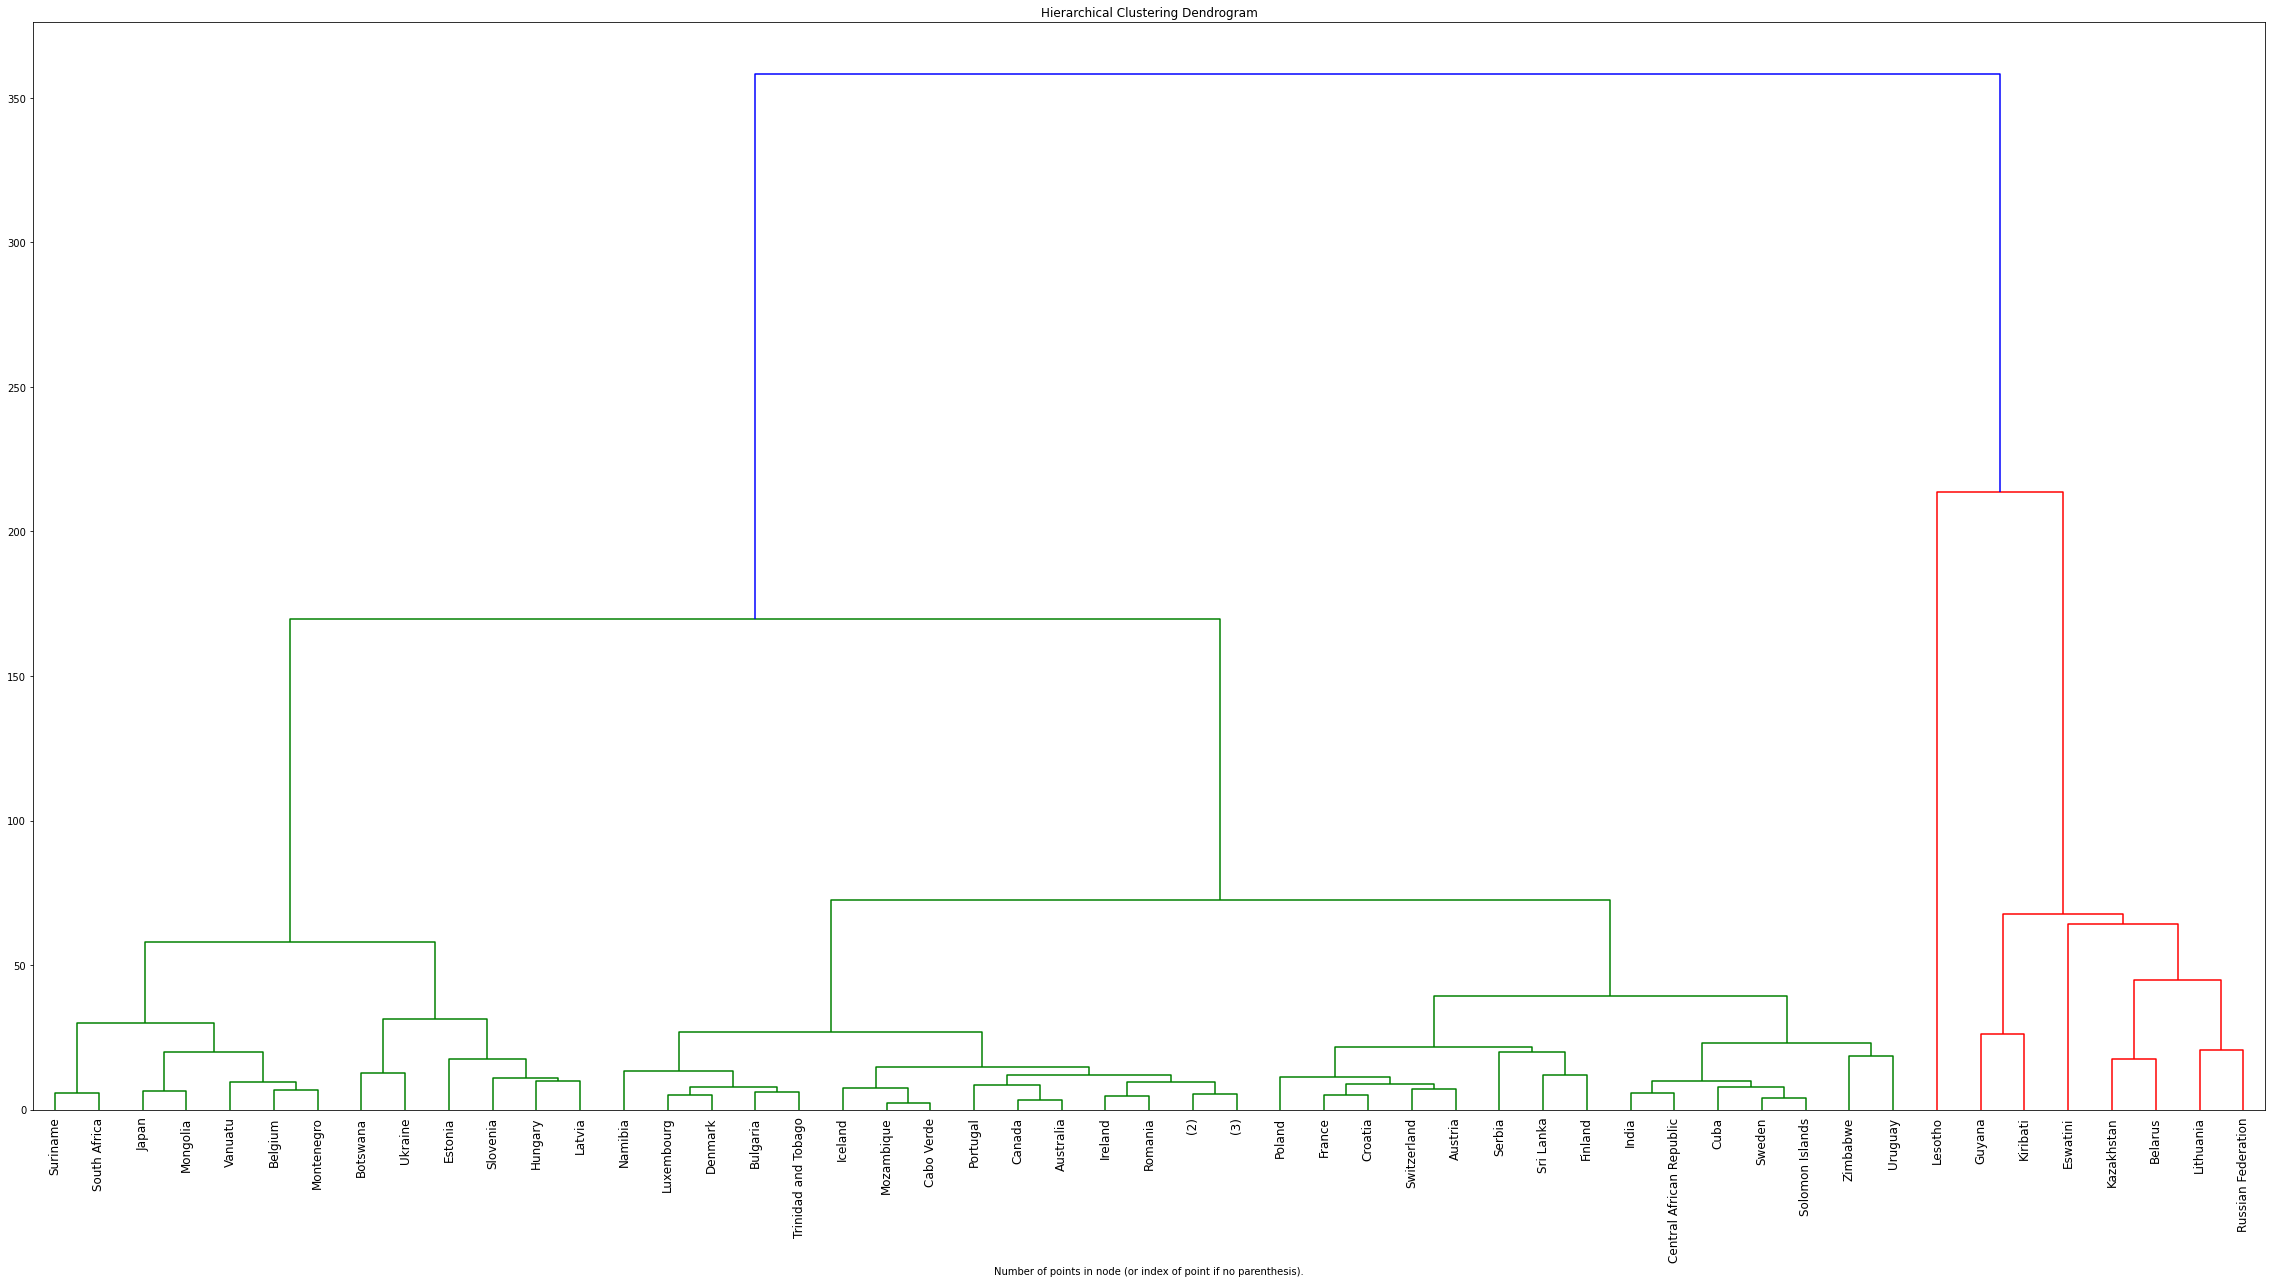

In [64]:
X = df1

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.figure(figsize=(40,20))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=7, labels=list(df1.index))
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.xticks(fontsize=12)
plt.savefig('cluster1.png')
plt.show()

**Analysis of the first cluster**
The first cluster can be seen in two groups. Eight countries fall into one group and 45 countries into another. The first group includes: Lesotho, Lithuania, Russia,Guyana, Kiribati, Eswatini, Kazakhstan, Belarus. The Baltic countries fall into one cluster, but within the cluster, Lithuania would fall into a different group than Latvia and Estonia.


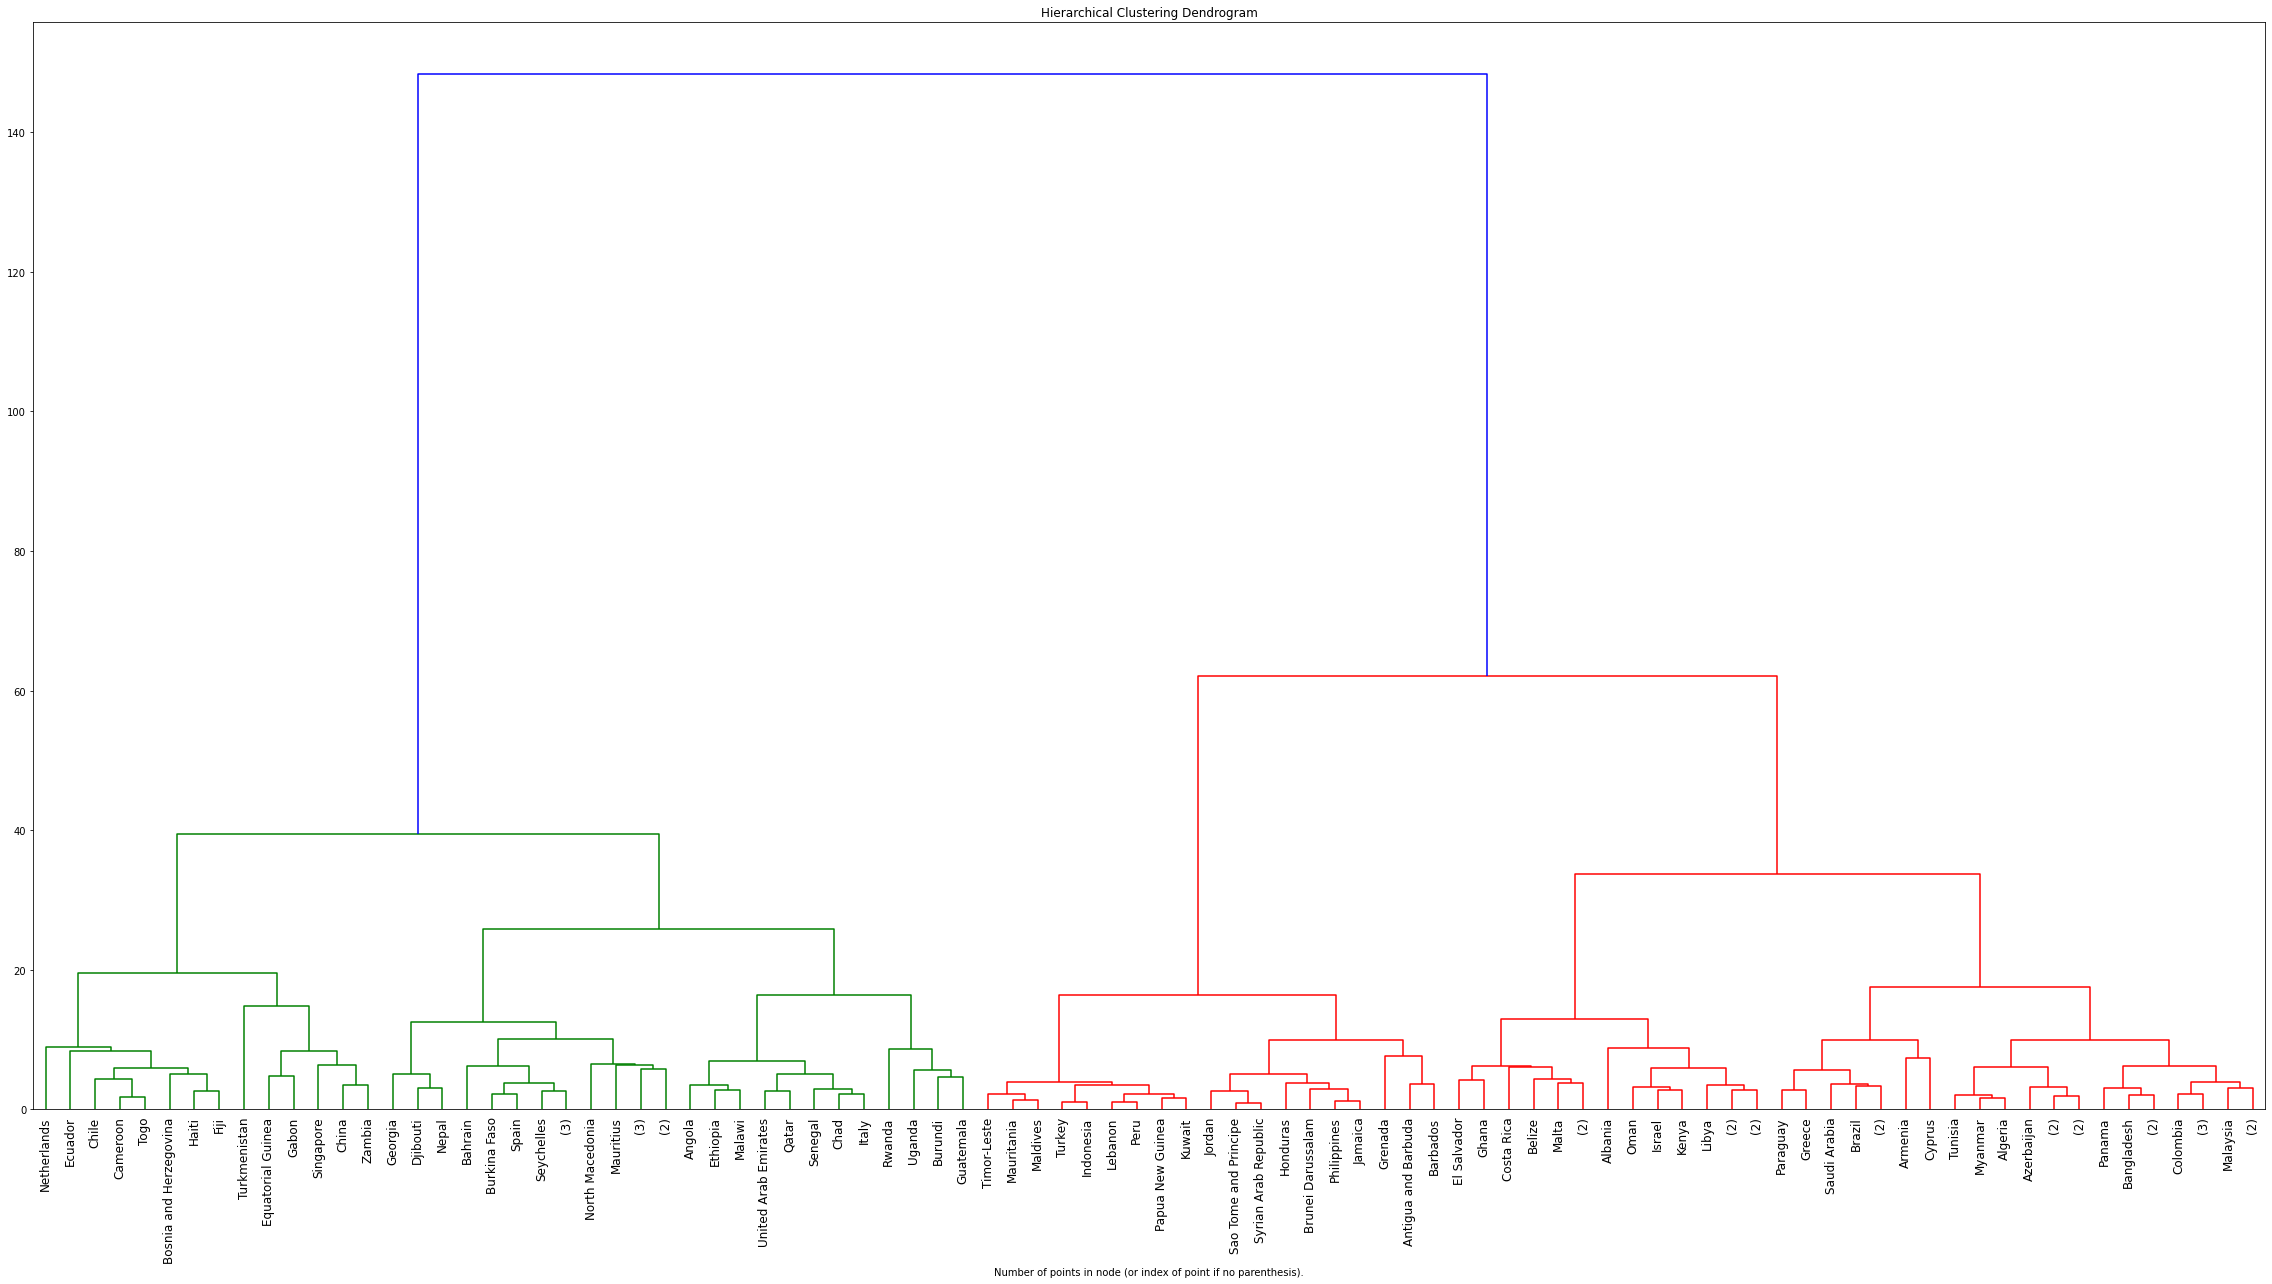

In [66]:
X = df2

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.figure(figsize=(40,20))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=7, labels=list(df2.index))
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.xticks(fontsize=12)
plt.savefig('cluster2.png')
plt.show()

**Analysis of the second cluster**

The second cluster can be seen in two groups. 

